# Node Classification with Graph Neural Networks

**Author:** Jose Rativa, Laura Castiblanco, Nicol Guerrero, Santiago Hernandez, Angel Peñarredonda<br>
**Description:** Implementación de un GNN para la predicción de enfermedades segun sus sintomas




## Setup

In [ ]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import unicodedata

## Prepare the Dataset


Complejidad de Leer DataSet

Complejidad Generica : O(1)

Complejidad especifica : O(1)

In [ ]:
Symptoms = pd.read_csv('DISEASES.csv', sep=',',header=1,names=["Code", "name", "symptoms"] )  ## O(1)

#print(Symptoms.describe())
# with open('diseaseSymptoms.csv',newline='') as f:
#     r = csv.reader(f)
#     data = [line for line in r]
print("Symptoms shape:", Symptoms.shape)                                                       ##O(1)

Symptoms shape: (795, 3)


In [ ]:
Symptoms.head()  ##O(1)

,Code,name,symptoms
0,106,Vocal cord polyp,"[{""symptoms"":""Hoarse voice""}|{""symptoms"":""91""}..."
1,107,Turner syndrome,"[{""symptoms"":""Groin mass""}|{""symptoms"":""27""}|{..."
2,108,Cryptorchidism,"[{""symptoms"":""Symptoms of the scrotum and test..."
3,109,Poisoning due to ethylene glycol,"[{""symptoms"":""Abusing alcohol""}|{""symptoms"":""7..."
4,110,Atrophic vaginitis,"[{""symptoms"":""Vaginal itching""}|{""symptoms"":""4..."


Complejidad de modificar datos de una columna del Dataset

Complejidad Generica : O(n)

Complejidad especifica : O(longitudDatos)

In [ ]:
for i in range(len(Symptoms)): #O(n)              #O(len(datos))
  Symptoms.symptoms.iloc[i] = Symptoms.symptoms.iloc[i].split("|") ##O(1)
Symptoms 

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Code,name,symptoms
0,106,Vocal cord polyp,"[[{""symptoms"":""Hoarse voice""}, {""symptoms"":""91..."
1,107,Turner syndrome,"[[{""symptoms"":""Groin mass""}, {""symptoms"":""27""}..."
2,108,Cryptorchidism,"[[{""symptoms"":""Symptoms of the scrotum and tes..."
3,109,Poisoning due to ethylene glycol,"[[{""symptoms"":""Abusing alcohol""}, {""symptoms"":..."
4,110,Atrophic vaginitis,"[[{""symptoms"":""Vaginal itching""}, {""symptoms"":..."
...,...,...,...
790,602,Kaposi sarcoma,"[[{""symptoms"":""Leg pain""}, {""symptoms"":""45""}, ..."
791,603,Spondylolisthesis,"[[{""symptoms"":""Low back pain""}, {""symptoms"":""8..."
792,604,Pseudotumor cerebri,"[[{""symptoms"":""Headache""}, {""symptoms"":""88""}, ..."
793,605,Conjunctivitis due to virus,"[[{""symptoms"":""Eye redness""}, {""symptoms"":""91""..."


Complejidad de separar enfermedades y sintomas en listas

Complejidad Generica : O(n^2)

Complejidad especifica : O((longitudDatos)^2)

In [ ]:
Diseases = Symptoms.symptoms.iloc[2] # O(1)
Symptoms2 =[]                        # O(1)
Disease = []                         # O(1)
Weight = []                          # O(1)
SymptomsC = []                       # O(1)
Diseases2 = []                       # O(1)
symptoms3 = []                       # O(1)

for i in range(len(Symptoms)):   # O(n)                                 #O(len(datos))
  disease = Symptoms.name[i]         # O(1)  
  Diseases2.append(disease)          # O(1)
  symptoms4 = []                     # O(1)
  #SymptomsList = Symptoms.symptoms.iloc[i].remove(Symptoms.symptoms.iloc[i][len(Symptoms.symptoms.iloc[i]-1)])
  for j in range(len(Symptoms.symptoms.iloc[i])):   # O(n)              #O(len(datos))
    palabra = Symptoms.symptoms.iloc[i][j]              # O(1)
    #print(palabra)
    palabra= palabra.split(":")                         # O(1)
    palabra[1]=palabra[1][1:len(palabra[1])-2]          # O(1)
    #palabra[1].replace('"', '')
    if j%2 ==0: 
      symptoms4.append(palabra[1])                      # O(1)
      Symptoms2.append(palabra[1])                      # O(1)
      Disease.append(disease)                           # O(1)
      if palabra[1] not in SymptomsC: 
        SymptomsC.append(palabra[1])                    # O(1)
      
    else : 
      Weight.append(int(palabra[1]))                    # O(1)
  symptoms3.append(symptoms4)                       # O(1)

\Complejidad de crear Dataset

Complejidad Generica : O(1)

Complejidad especifica : O(1)

In [ ]:
data = {'DiseaseName': Disease,  #O(1)
         'Symptoms': Symptoms2,
         'Weight': Weight}
df = pd.DataFrame(data)          #O(1)
df

,DiseaseName,Symptoms,Weight
0,Vocal cord polyp,Hoarse voice,91
1,Vocal cord polyp,Sore throat,47
2,Vocal cord polyp,Difficulty speaking,27
3,Vocal cord polyp,Cough,27
4,Vocal cord polyp,Nasal congestion,27
...,...,...,...
9085,Open wound of the nose,Sleepiness,9
9086,Open wound of the nose,Sore in nose,9
9087,Open wound of the nose,Diminished hearing,9
9088,Open wound of the nose,Neck weakness,9


Complejidad de crear lista de listas

Complejidad Generica : O(n)

Complejidad especifica : O(len(SymptomsC)) Donde len(SymptomsC) es la cantidad de sintomas diferentes en el dataset inicial

In [ ]:
SymptomsNumber = []
for i in range(len(SymptomsC)):  ##O(n)           O(len(SymptomsC))   
  lista = []                     ##O(1)           O(1)
  SymptomsNumber.append(lista)   ##O(1)           O(1)


Complejidad de Agregar pesos y confirmaciones entre sintomas y enfermedades

Complejidad Generica : O(n^2)

Complejidad especifica : O(len(SymptomsC)*len(Diseases2)) Donde len(SymptomsC) es la cantidad de sintomas diferentes en el dataset inicial y len(Diseases) es la cantidad de enfermedades en el dataset Inicial

In [ ]:
## ##O(n^2)        O(len(Diseases2)*len(SymptomsC))
for i in range(len(Diseases2)):      ##O(n)        O(len(Diseases2))
  for j in range(len(SymptomsC)):     ##O(n)        O(len(SymptomsC))
    if SymptomsC[j] in symptoms3[i]:  ##O(1)        O(len(1))
        #num_wth = int(df[(df['Symptoms'] == SymptomsC[j] ) & (df['DiseaseName'] == Diseases2[i])]['Weight'])
        SymptomsNumber[j].append(1)   ##O(1)        O(len(1))
    else: 
        SymptomsNumber[j].append(0)   ##O(1)        O(len(1))

Complejidad de crear Dataset agregando un campo por cada sintoma

Complejidad Generica : O(n)

Complejidad especifica : O(len(SymptomsC))

In [ ]:
data2 = {'Code': Symptoms.Code,          ##O(1)
         'DiseaseName': Diseases2,
         }

for i in range (len(SymptomsC)):                  ##O(n)        O(len(SymptomsC))        
  data2['Symptom_'+str(i+1)] = SymptomsNumber[i]  ##O(1)
df2 = pd.DataFrame(data2)                         ##O(1)
df2


,Code,DiseaseName,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,...,Symptom_367,Symptom_368,Symptom_369,Symptom_370,Symptom_371,Symptom_372,Symptom_373,Symptom_374,Symptom_375,Symptom_376
0,106,Vocal cord polyp,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,107,Turner syndrome,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,108,Cryptorchidism,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,109,Poisoning due to ethylene glycol,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,110,Atrophic vaginitis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,602,Kaposi sarcoma,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
791,603,Spondylolisthesis,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
792,604,Pseudotumor cerebri,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
793,605,Conjunctivitis due to virus,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Crear Grafo**

Complejidad generica: 4*O(n)

Complejidad especifica: 4*O(len(datos))

In [ ]:
class_values = sorted(df["DiseaseName"].unique())                                         ##O(1)        O(1)
class_idx = {name: id for id, name in enumerate(class_values)}                           ##O(n)        O(len(datos))
ConjSymp_idx = {name: idx for idx, name in enumerate(sorted(df["Symptoms"].unique()))}    ##O(n)        O(len(datos))

df["Symptoms"] = df["Symptoms"].apply(lambda name: ConjSymp_idx[name])                    ##O(n)        O(len(datos))
# citations["source"] = citations["source"].apply(lambda name: ConjSymp_idx[name])
# citations["target"] = citations["target"].apply(lambda name: ConjSymp_idx[name])
df["DiseaseName"] = df["DiseaseName"].apply(lambda value: class_idx[value])               ##O(n)        O(len(datos))

In [ ]:
class_values = sorted(df2["DiseaseName"].unique())                                        ##O(1)        O(1)
class_idx = {name: id for id, name in enumerate(class_values)}                            ##O(n)        O(len(datos))
#ConjSymp_idx = {name: idx for idx, name in enumerate(sorted(df["Symptoms"].unique()))}

#df["Symptoms"] = df["Symptoms"].apply(lambda name: ConjSymp_idx[name])
# citations["source"] = citations["source"].apply(lambda name: ConjSymp_idx[name])
# citations["target"] = citations["target"].apply(lambda name: ConjSymp_idx[name])
df2["DiseaseName"] = df2["DiseaseName"].apply(lambda value: class_idx[value])             ##O(n)        O(len(datos))

**Graficar Grafo**

Complejidad generica: 3*O(n)

Complejidad especifica: 3*O(len(datos))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


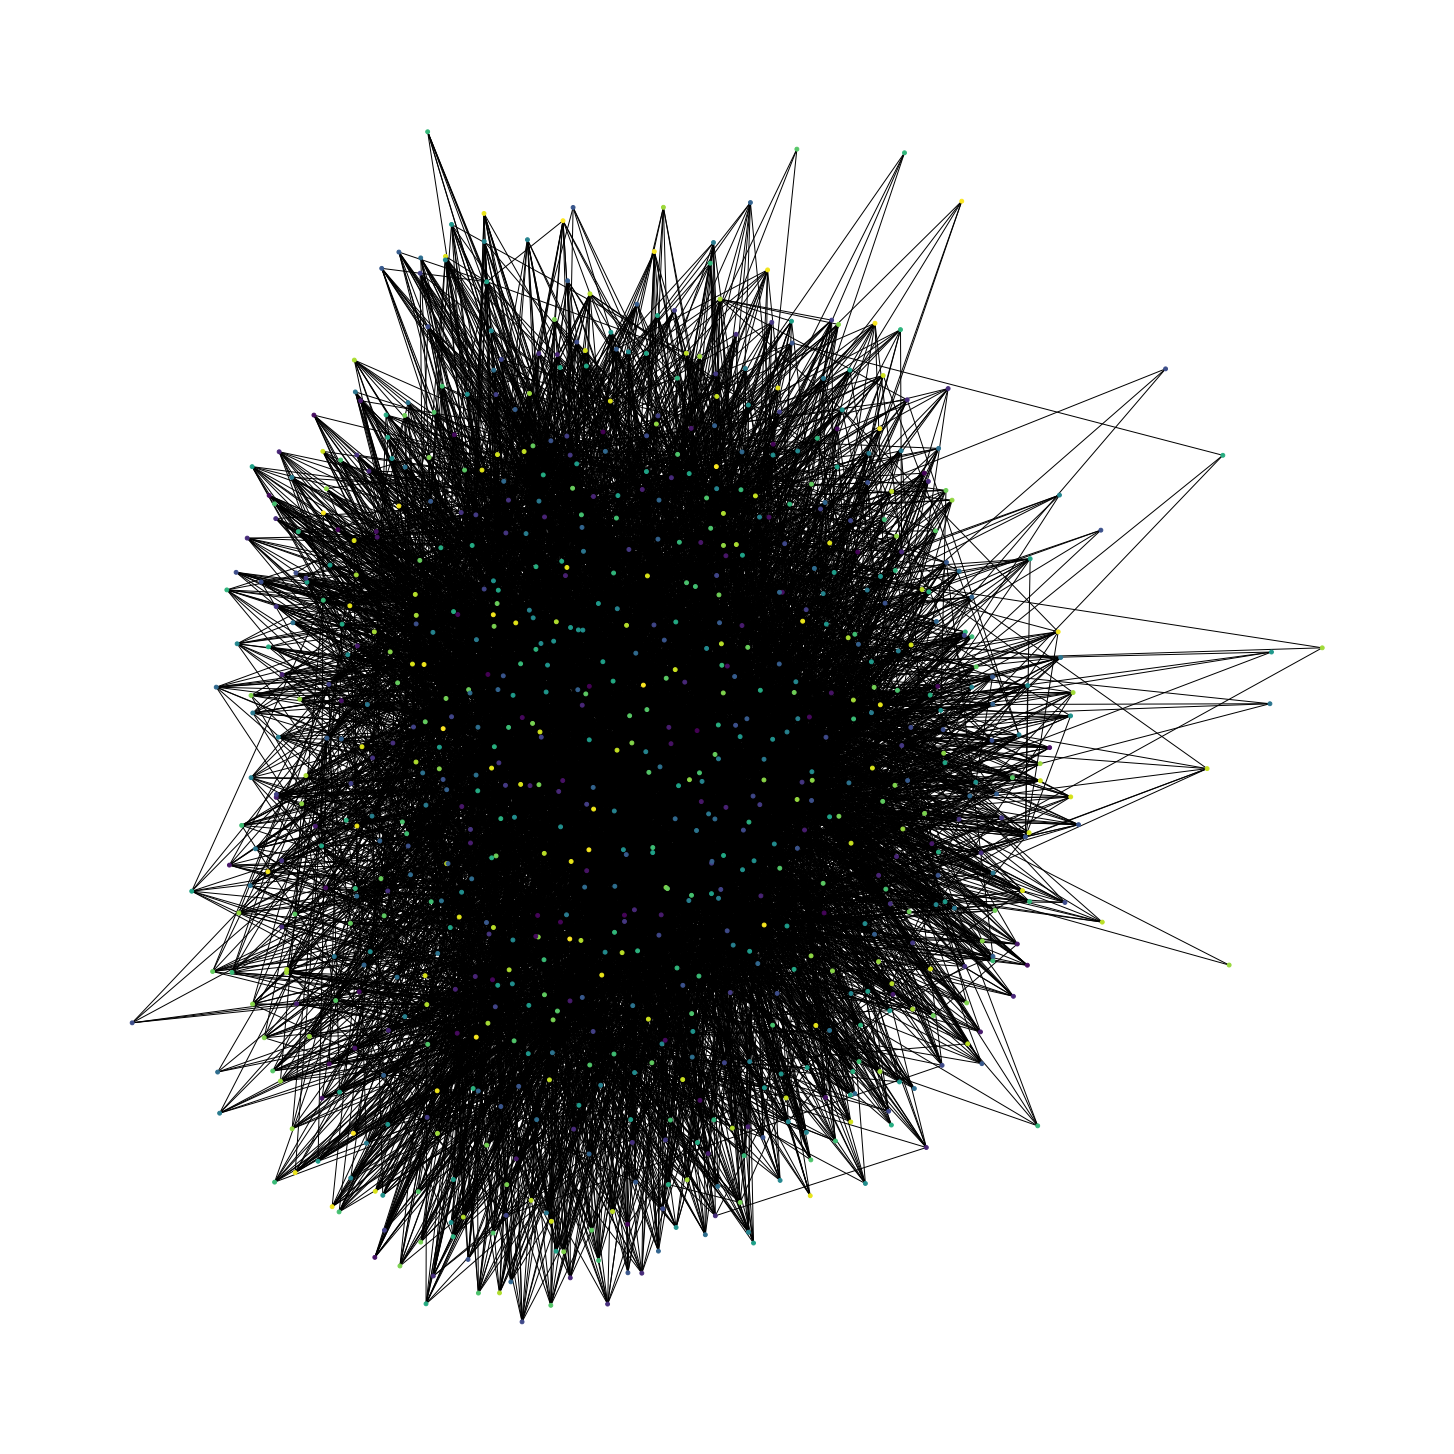

In [ ]:
plt.figure(figsize=(20, 20))                             ##O(1)        O(1)
cora_graph = nx.from_pandas_edgelist(df, source= 'DiseaseName', target = 'Symptoms' , edge_attr= True) ##O(n)        O(len(datos))
colores2 = list(df2[df["DiseaseName"].isin(list(cora_graph.nodes))]["DiseaseName"])                    ##O(n)        O(len(datos))
nx.draw_spring(cora_graph, node_size=15, node_color = colores2)                                        ##O(n)        O(len(datos))

**GNN**

**Dividir datos en dos conjuntos**

*   Conjunto de entrenamiento
*   Conjunto de prueba



Complejidad generica: O(n)

Complejidad especifica: O(len(datos))

In [ ]:
train_data, test_data = [], []                                        ##O(1)        O(1)

for _, group_data in df2.groupby("DiseaseName"):                      ##O(n)        O(len(datos))
    # Select around 50% of the dataset for training.
    random_selection = np.random.rand(len(group_data.index)) <= 0.6   ##O(1)        O(1)
    train_data.append(group_data[random_selection])                   ##O(1)        O(1)
    test_data.append(group_data[~random_selection])                   ##O(1)        O(1)

train_data = pd.concat(train_data).sample(frac=1)               ##O(1)        O(1)
test_data = pd.concat(test_data).sample(frac=1)                 ##O(1)        O(1)

print("Train data shape:", train_data.shape)                    ##O(1)        O(1)
print("Test data shape:", test_data.shape)                      ##O(1)        O(1)

Train data shape: (477, 378)
Test data shape: (318, 378)


**Instanciar parametros de la red Neuronal**


Complejidad generica: O(1)

Complejidad especifica: O(1)

In [ ]:
hidden_units = [32, 32]    ##O(1)        O(1)
learning_rate = 0.01       ##O(1)        O(1)
dropout_rate = 0.5         ##O(1)        O(1)
num_epochs = 100           ##O(1)        O(1)
batch_size = 256           ##O(1)        O(1)

This function compiles and trains an input model using the given training data.

Entrena el modelo usando los datos de entrenamiento

**Funcion Correr experimento**

Complejidad generica: 2*O(n)

Complejidad especifica: 2*O(len(datos))

In [ ]:
def run_experiment(model, x_train, y_train):
    # Compile the model.
    model.compile(                                    ##O(n)                 O(len(datos))
        optimizer=keras.optimizers.Adam(learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )
    # Create an early stopping callback.
    early_stopping = keras.callbacks.EarlyStopping(   ##O(1)
        monitor="val_acc", patience=10, restore_best_weights=True
    )
    # Fit the model.
    history = model.fit(  ##O(n)                                O(len(datos))
        x=x_train,
        y=y_train,
        epochs=num_epochs,
        batch_size=batch_size,
        validation_split=0.15,
        callbacks=tf.keras.callbacks.History()
    )
    return history

**Mostrar curvas de Aprendizaje**

Complejidad generica: 4*O(n)

Complejidad especifica : 4*O(len(history)) donde History son las tasas de aprendizaje

In [ ]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) ##O(1)

    ax1.plot(history.history["loss"])                     ##O(N)                O(len(history))
    ax1.plot(history.history["val_loss"])                 ##O(N)                O(len(history))
    ax1.legend(["train", "test"], loc="upper right")      ##O(1)                ##O(1)
    ax1.set_xlabel("Epochs")                              ##O(1)                ##O(1)
    ax1.set_ylabel("Loss")                                ##O(1)                ##O(1)

    ax2.plot(history.history["acc"])                      ##O(N)                O(len(history))
    ax2.plot(history.history["val_acc"])                  ##O(N)                O(len(history))
    ax2.legend(["train", "test"], loc="upper right")      ##O(1)                ##O(1)
    ax2.set_xlabel("Epochs")                              ##O(1)                ##O(1)
    ax2.set_ylabel("Accuracy")                            ##O(1)                ##O(1)
    plt.show()                                            ##O(1)                ##O(1)

**PREPARAR DATOS PARA EL MODELO**

Complejidad generica:O(1)

Complejidad Especifica: O(1) 

In [ ]:
feature_names = set(df2.columns) - {"Code", "DiseaseName"}  ##O(1)                ##O(1)
num_features = len(feature_names)                           ##O(1)                ##O(1)
num_classes = len(class_idx)  +1                              ##O(1)                ##O(1)

# Create train and test features as a numpy array.
x_train = train_data[feature_names].to_numpy()              ##O(1)                ##O(1)
x_test = test_data[feature_names].to_numpy()  
print(x_train)              ##O(1)                ##O(1)
# Create train and test targets as a numpy array.
y_train = train_data["DiseaseName"]                         ##O(1)                ##O(1)
y_test = test_data["DiseaseName"]     
print(y_train)                        ##O(1)                ##O(1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
591    599
718    187
267    481
152    777
454    395
      ... 
315    510
4       64
20     632
517    740
608    282
Name: DiseaseName, Length: 477, dtype: int64


In [ ]:
num_classes

796

## Implement Feedforward Network (FFN) Module

We will use this module in the baseline and the GNN models.

Complejidad generica:O(N)

Complejidad Especifica: O(hidden_units)

In [ ]:
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:                             #O(n)          O(hidden_units)
        fnn_layers.append(layers.BatchNormalization())                  ##O(1)                ##O(1)
        fnn_layers.append(layers.Dropout(dropout_rate))                 ##O(1)                ##O(1)
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))   ##O(1)                ##O(1)

    return keras.Sequential(fnn_layers, name=name)                      ##O(1)                ##O(1)

## Construcción de la GNN

### Prepare the data for the graph model

Preparing and loading the graphs data into the model for training is the most challenging
part in GNN models, which is addressed in different ways by the specialised libraries.
In this example, we show a simple approach for preparing and using graph data that is suitable
if your dataset consists of a single graph that fits entirely in memory.

The graph data is represented by the `graph_info` tuple, which consists of the following
three elements:

1. `node_features`: This is a `[num_nodes, num_features]` NumPy array that includes the
node features. In this dataset, the nodes are the papers, and the `node_features` are the
word-presence binary vectors of each paper.
2. `edges`:  This is `[num_edges, num_edges]` NumPy array representing a sparse
[adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix#:~:text=In%20graph%20theory%20and%20computer,with%20zeros%20on%20its%20diagonal.)
of the links between the nodes. In this example, the links are the citations between the papers.
3. `edge_weights` (optional): This is a `[num_edges]` NumPy array that includes the edge weights, which *quantify*
the relationships between nodes in the graph. In this example, there are no weights for the paper citations.

In [ ]:
# Create an edges array (sparse adjacency matrix) of shape [2, num_edges].
edges = df[["DiseaseName", "Symptoms"]].to_numpy().T
# Create an edge weights array of ones.
edge_weights = tf.ones(shape=edges.shape[1])
# Create a node features array of shape [num_nodes, num_features].
node_features = tf.cast(
    df2.sort_values("Code")[feature_names].to_numpy(), dtype=tf.dtypes.float32
)
# Create graph info tuple with node_features, edges, and edge_weights.
graph_info = (node_features, edges, edge_weights)
print(graph_info )

print("Edges shape:", edges.shape)
print("Nodes shape:", node_features.shape)

(<tf.Tensor: shape=(795, 376), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>, array([[781, 781, 781, ..., 522, 522, 522],
       [148, 317,  70, ...,  71, 236, 187]]), <tf.Tensor: shape=(9090,), dtype=float32, numpy=array([1., 1., 1., ..., 1., 1., 1.], dtype=float32)>)
Edges shape: (2, 9090)
Nodes shape: (795, 376)


### Implement a graph convolution layer

We implement a graph convolution module as a [Keras Layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer?version=nightly).
Our `GraphConvLayer` performs the following steps:

1. **Prepare**: The input node representations are processed using a FFN to produce a *message*. You can simplify
the processing by only applying linear transformation to the representations.
2. **Aggregate**: The messages of the neighbours of each node are aggregated with
respect to the `edge_weights` using a *permutation invariant* pooling operation, such as *sum*, *mean*, and *max*,
to prepare a single aggregated message for each node. See, for example, [tf.math.unsorted_segment_sum](https://www.tensorflow.org/api_docs/python/tf/math/unsorted_segment_sum)
APIs used to aggregate neighbour messages.
3. **Update**: The `node_repesentations` and `aggregated_messages`—both of shape `[num_nodes, representation_dim]`—
are combined and processed to produce the new state of the node representations (node embeddings).
If `combination_type` is `gru`, the `node_repesentations` and `aggregated_messages` are stacked to create a sequence,
then processed by a GRU layer. Otherwise, the `node_repesentations` and `aggregated_messages` are added
or concatenated, then processed using a FFN.


The technique implemented use ideas from [Graph Convolutional Networks](https://arxiv.org/abs/1609.02907),
[GraphSage](https://arxiv.org/abs/1706.02216), [Graph Isomorphism Network](https://arxiv.org/abs/1810.00826),
[Simple Graph Networks](https://arxiv.org/abs/1902.07153), and
[Gated Graph Sequence Neural Networks](https://arxiv.org/abs/1511.05493).
Two other key techniques that are not covered are [Graph Attention Networks](https://arxiv.org/abs/1710.10903)
and [Message Passing Neural Networks](https://arxiv.org/abs/1704.01212).

In [ ]:
class GraphConvLayer(layers.Layer):
    def __init__(
        self,
        hidden_units,
        dropout_rate=0.2,
        aggregation_type="mean",
        combination_type="concat",
        normalize=False,
        *args,
        **kwargs,
    ):
        super(GraphConvLayer, self).__init__(*args, **kwargs)

        self.aggregation_type = aggregation_type
        self.combination_type = combination_type
        self.normalize = normalize

        self.ffn_prepare = create_ffn(hidden_units, dropout_rate)
        if self.combination_type == "gated":
            self.update_fn = layers.GRU(
                units=hidden_units,
                activation="tanh",
                recurrent_activation="sigmoid",
                dropout=dropout_rate,
                return_state=True,
                recurrent_dropout=dropout_rate,
            )
        else:
            self.update_fn = create_ffn(hidden_units, dropout_rate)

    def prepare(self, node_repesentations, weights=None):
        # node_repesentations shape is [num_edges, embedding_dim].
        messages = self.ffn_prepare(node_repesentations)
        if weights is not None:
            messages = messages * tf.expand_dims(weights, -1)
        return messages

    def aggregate(self, node_indices, neighbour_messages, node_repesentations):
        # node_indices shape is [num_edges].
        # neighbour_messages shape: [num_edges, representation_dim].
        # node_repesentations shape is [num_nodes, representation_dim].
        num_nodes = node_repesentations.shape[0]
        if self.aggregation_type == "sum":
            aggregated_message = tf.math.unsorted_segment_sum(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "mean":
            aggregated_message = tf.math.unsorted_segment_mean(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        elif self.aggregation_type == "max":
            aggregated_message = tf.math.unsorted_segment_max(
                neighbour_messages, node_indices, num_segments=num_nodes
            )
        else:
            raise ValueError(f"Invalid aggregation type: {self.aggregation_type}.")

        return aggregated_message

    def update(self, node_repesentations, aggregated_messages):
        # node_repesentations shape is [num_nodes, representation_dim].
        # aggregated_messages shape is [num_nodes, representation_dim].
        if self.combination_type == "gru":
            # Create a sequence of two elements for the GRU layer.
            h = tf.stack([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "concat":
            # Concatenate the node_repesentations and aggregated_messages.
            h = tf.concat([node_repesentations, aggregated_messages], axis=1)
        elif self.combination_type == "add":
            # Add node_repesentations and aggregated_messages.
            h = node_repesentations + aggregated_messages
        else:
            raise ValueError(f"Invalid combination type: {self.combination_type}.")

        # Apply the processing function.
        node_embeddings = self.update_fn(h)
        if self.combination_type == "gru":
            node_embeddings = tf.unstack(node_embeddings, axis=1)[-1]

        if self.normalize:
            node_embeddings = tf.nn.l2_normalize(node_embeddings, axis=-1)
        return node_embeddings

    def call(self, inputs):
        """Process the inputs to produce the node_embeddings.
        inputs: a tuple of three elements: node_repesentations, edges, edge_weights.
        Returns: node_embeddings of shape [num_nodes, representation_dim].
        """
        
        node_repesentations, edges, edge_weights = inputs
        # Get node_indices (source) and neighbour_indices (target) from edges.
        node_indices, neighbour_indices = edges[0], edges[1]
        # neighbour_repesentations shape is [num_edges, representation_dim].
        neighbour_repesentations = tf.gather(node_repesentations-1, neighbour_indices)

        # Prepare the messages of the neighbours.
        neighbour_messages = self.prepare(neighbour_repesentations-1, edge_weights)
        # Aggregate the neighbour messages.
        aggregated_messages = self.aggregate(
            node_indices-1, neighbour_messages-1, node_repesentations-1
        )
        # Update the node embedding with the neighbour messages.
        return self.update(node_repesentations, aggregated_messages)


In [ ]:
node_features

<tf.Tensor: shape=(795, 376), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

### Implement a graph neural network node classifier

The GNN classification model follows the [Design Space for Graph Neural Networks](https://arxiv.org/abs/2011.08843) approach,
as follows:

1. Apply preprocessing using FFN to the node features to generate initial node representations.
2. Apply one or more graph convolutional layer, with skip connections,  to the node representation
to produce node embeddings.
3. Apply post-processing using FFN to the node embeddings to generat the final node embeddings.
4. Feed the node embeddings in a Softmax layer to predict the node class.

Each graph convolutional layer added captures information from a further level of neighbours.
However, adding many graph convolutional layer can cause oversmoothing, where the model
produces similar embeddings for all the nodes.

Note that the `graph_info` passed to the constructor of the Keras model, and used as a *property*
of the Keras model object, rather than input data for training or prediction.
The model will accept a **batch** of `node_indices`, which are used to lookup the
node features and neighbours from the `graph_info`.

In [ ]:
class GNNNodeClassifier(tf.keras.Model):
    def __init__(
        self,
        graph_info,
        num_classes,
        hidden_units,
        aggregation_type="sum",
        combination_type="concat",
        dropout_rate=0.2,
        normalize=True,
        *args,
        **kwargs,
    ):
        super(GNNNodeClassifier, self).__init__(*args, **kwargs)

        # Unpack graph_info to three elements: node_features, edges, and edge_weight.
        node_features, edges, edge_weights = graph_info
        self.node_features = node_features
        self.edges = edges 
        self.edge_weights = edge_weights
        # Set edge_weights to ones if not provided.
        if self.edge_weights is None:
            self.edge_weights = tf.ones(shape=edges.shape[1])
        # Scale edge_weights to sum to 1.
        self.edge_weights = self.edge_weights / tf.math.reduce_sum(self.edge_weights)

        # Create a process layer.
        self.preprocess = create_ffn(hidden_units, dropout_rate, name="preprocess")
        # Create the first GraphConv layer.
        self.conv1 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv1",
        )
        # Create the second GraphConv layer.
        self.conv2 = GraphConvLayer(
            hidden_units,
            dropout_rate,
            aggregation_type,
            combination_type,
            normalize,
            name="graph_conv2",
        )
        # Create a postprocess layer.
        self.postprocess = create_ffn(hidden_units, dropout_rate, name="postprocess")
        # Create a compute logits layer.
        self.compute_logits = layers.Dense(units=num_classes, name="logits")

    def call(self, input_node_indices):
        # Preprocess the node_features to produce node representations.
        x = self.preprocess(self.node_features)
        # Apply the first graph conv layer.
        x1 = self.conv1((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x1 + x
        # Apply the second graph conv layer.
        x2 = self.conv2((x, self.edges, self.edge_weights))
        # Skip connection.
        x = x2 + x
        # Postprocess node embedding.
        x = self.postprocess(x)
        # Fetch node embeddings for the input node_indices.
        node_embeddings = tf.gather(x-1, input_node_indices)
        # Compute logits
        return self.compute_logits(node_embeddings)


Let's test instantiating and calling the GNN model.
Notice that if you provide `N` node indices, the output will be a tensor of shape `[N, num_classes]`,
regardless of the size of the graph.

In [ ]:
gnn_model = GNNNodeClassifier(
    graph_info=graph_info,
    num_classes=num_classes,
    hidden_units=hidden_units,
    dropout_rate=dropout_rate,
    name="gnn_model",
)

print("GNN output shape:", gnn_model([1, 10, 100]))

gnn_model.summary()

GNN output shape: tf.Tensor(
[[ 0.3260428  -0.1410396   0.07126634 ...  0.67757887  0.2097849
  -0.01660213]
 [ 0.32439733 -0.13525927  0.0750995  ...  0.677724    0.21151066
  -0.01438469]
 [ 0.3287722  -0.13604787  0.07980752 ...  0.6769113   0.20551553
  -0.00900573]], shape=(3, 796), dtype=float32)
Model: "gnn_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 preprocess (Sequential)     (795, 32)                 14752     
                                                                 
 graph_conv1 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 graph_conv2 (GraphConvLayer  multiple                 5888      
 )                                                               
                                                                 
 postprocess (Seq

### Train the GNN model

Note that we use the standard *supervised* cross-entropy loss to train the model.
However, we can add another *self-supervised* loss term for the generated node embeddings
that makes sure that neighbouring nodes in graph have similar representations, while faraway
nodes have dissimilar representations.

In [ ]:
x_train = train_data.index.to_numpy()
history = run_experiment(gnn_model, x_train, y_train)

Epoch 1/100
2/2 [==============================] - 10s 2s/step - loss: 6.7592 - acc: 0.0000e+00 - val_loss: 7.1802 - val_acc: 0.0000e+00
Epoch 2/100
2/2 [==============================] - 0s 160ms/step - loss: 6.5058 - acc: 0.0049 - val_loss: 7.7480 - val_acc: 0.0000e+00
Epoch 3/100
2/2 [==============================] - 0s 248ms/step - loss: 6.3594 - acc: 0.0000e+00 - val_loss: 8.3719 - val_acc: 0.0000e+00
Epoch 4/100
2/2 [==============================] - 0s 208ms/step - loss: 6.2494 - acc: 0.0074 - val_loss: 9.0033 - val_acc: 0.0000e+00
Epoch 5/100
2/2 [==============================] - 0s 221ms/step - loss: 6.1547 - acc: 0.0074 - val_loss: 9.5977 - val_acc: 0.0000e+00
Epoch 6/100
2/2 [==============================] - 0s 197ms/step - loss: 6.0724 - acc: 0.0074 - val_loss: 10.1320 - val_acc: 0.0000e+00
Epoch 7/100
2/2 [==============================] - 0s 127ms/step - loss: 6.0573 - acc: 0.0025 - val_loss: 10.6161 - val_acc: 0.0000e+00
Epoch 8/100
2/2 [==============================

Let's plot the learning curves

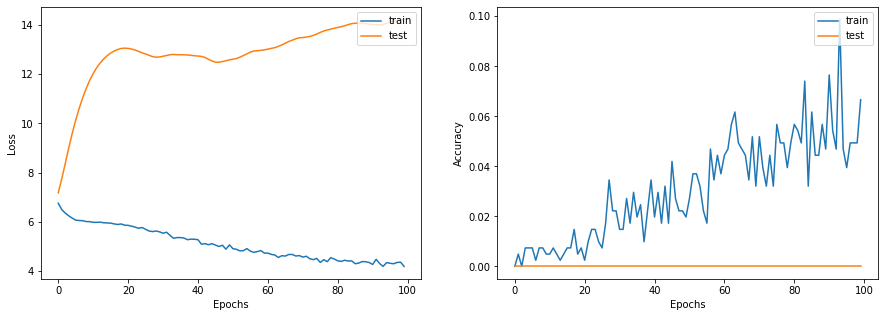

In [ ]:
display_learning_curves(history)

Now we evaluate the GNN model on the test data split.
The results may vary depending on the training sample, however the GNN model always outperforms
the baseline model in terms of the test accuracy.

In [ ]:
x_test = test_data.index.to_numpy()
gnn_model.evaluate(x=x_test, y=y_test, verbose=0)

[14.073066711425781, 0.0]

In [ ]:
x_test = test_data.index.to_numpy()
_, test_accuracy = gnn_model.evaluate(x=x_test, y=y_test, verbose=0)
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")

Test accuracy: 0.0%
